# COVID-19 Dataset

The dataset was provided by the Mexican government. This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

sex: female or male
age: of the patient.
classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
patient type: hospitalized or not hospitalized.
pneumonia: whether the patient already have air sacs inflammation or not.
pregnancy: whether the patient is pregnant or not.
diabetes: whether the patient has diabetes or not.
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
asthma: whether the patient has asthma or not.
inmsupr: whether the patient is immunosuppressed or not.
hypertension: whether the patient has hypertension or not.
cardiovascular: whether the patient has heart or blood vessels related disease.
renal chronic: whether the patient has chronic renal disease or not.
other disease: whether the patient has other disease or not.
obesity: whether the patient is obese or not.
tobacco: whether the patient is a tobacco user.
usmr: Indicates whether the patient treated medical units of the first, second or third level.
medical unit: type of institution of the National Health System that provided the care.
intubed: whether the patient was connected to the ventilator.
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
death: indicates whether the patient died or recovered.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or no

### Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

#Classification
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import normalize,scale

In [2]:
df = pd.read_csv("Covid Data.csv")

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2.0,2.0,3.0,97.0


## EDA - Exploratory Data Analysis

In [4]:
df.shape

(115228, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115228 entries, 0 to 115227
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 115228 non-null  int64  
 1   MEDICAL_UNIT          115228 non-null  int64  
 2   SEX                   115228 non-null  int64  
 3   PATIENT_TYPE          115228 non-null  int64  
 4   DATE_DIED             115228 non-null  object 
 5   INTUBED               115228 non-null  int64  
 6   PNEUMONIA             115228 non-null  int64  
 7   AGE                   115228 non-null  int64  
 8   PREGNANT              115228 non-null  int64  
 9   DIABETES              115228 non-null  int64  
 10  COPD                  115228 non-null  int64  
 11  ASTHMA                115228 non-null  int64  
 12  INMSUPR               115228 non-null  int64  
 13  HIPERTENSION          115228 non-null  int64  
 14  OTHER_DISEASE         115228 non-null  int64  
 15  

In [6]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           1
TOBACCO                 1
CLASIFFICATION_FINAL    1
ICU                     1
dtype: int64

In [7]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [8]:
#usmr: Indicates whether the patient treated medical units of the first, second or third level.
df['USMER'].value_counts()

2    60641
1    54587
Name: USMER, dtype: int64

In [9]:
#medical unit: type of institution of the National Health System that provided the care.
df['MEDICAL_UNIT'].value_counts()
#categorical features 1 to 13

4    95733
3    19175
2      169
1      151
Name: MEDICAL_UNIT, dtype: int64

In [10]:
#patient type: hospitalized or not hospitalized.
df['PATIENT_TYPE'].value_counts()

1    58987
2    56241
Name: PATIENT_TYPE, dtype: int64

In [11]:
df['DATE_DIED'].value_counts()

9999-99-99    73821
07/07/2020      552
16/06/2020      541
06/07/2020      537
13/07/2020      536
              ...  
20/10/2020        1
18/10/2020        1
16/10/2020        1
14/10/2020        1
12/10/2020        1
Name: DATE_DIED, Length: 337, dtype: int64

# There is 971633 "9999-99-99" in the "DATE_DIED" column which means alive patients.
# returned to this column to "DEATH" patient alive or death 

In [12]:
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

In [13]:
df.drop(columns=["DATE_DIED"], inplace=True)

In [14]:
df['INTUBED'].value_counts() 

97    58987
2     38548
1     16740
99      953
Name: INTUBED, dtype: int64

In [15]:
# too many missing values
df.drop(columns=["INTUBED"], inplace=True)

In [16]:
df['PNEUMONIA'].value_counts() #99 represents nan values

2     78849
1     35620
99      759
Name: PNEUMONIA, dtype: int64

In [17]:
df = df.loc[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]

In [18]:
df['AGE'].value_counts()

46     2514
48     2500
47     2406
49     2390
45     2385
       ... 
100      10
101       1
107       1
102       1
103       1
Name: AGE, Length: 105, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

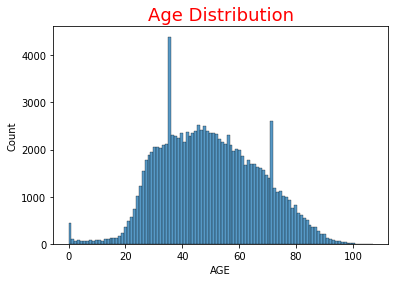

In [19]:
sns.histplot(x=df.AGE)
plt.title("Age Distribution", color="red", fontsize=18)

In [20]:
# Patients age interval mostly in 20-60

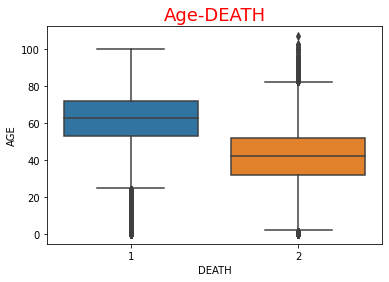

In [21]:
sns.boxplot(x="DEATH", y="AGE",data=df)
plt.title("Age-DEATH",fontsize=18, color="red");

In [22]:
# 1 (patients died) age interval older compared to 2 (alive) patients.

In [23]:
df['PREGNANT'].value_counts()

97    62653
2     51203
1       555
98       58
Name: PREGNANT, dtype: int64

In [24]:
#will leave 1 on "PREGNANT" and change others to 2
df['PREGNANT'] = df['PREGNANT'].apply(lambda x: x if x == 1 else 2)

In [25]:
df['DIABETES'].value_counts()

2     89605
1     24709
98      155
Name: DIABETES, dtype: int64

In [26]:
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)] #only take 1 and 2 

In [27]:
#copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
df['COPD'].value_counts()

2     111124
1       3165
98        25
Name: COPD, dtype: int64

In [28]:
df = df[(df.COPD == 1) | (df.COPD == 2)]

In [29]:
df['ASTHMA'].value_counts()

2     111177
1       3100
98        12
Name: ASTHMA, dtype: int64

In [30]:
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]

In [31]:
#inmsupr: whether the patient is immunosuppressed or not.
df['INMSUPR'].value_counts()

2     111710
1       2554
98        13
Name: INMSUPR, dtype: int64

In [32]:
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]

In [33]:
df['HIPERTENSION'].value_counts()

2     83211
1     31049
98        4
Name: HIPERTENSION, dtype: int64

In [34]:
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]

In [35]:
df['OTHER_DISEASE'].value_counts()

2     107803
1       6421
98        36
Name: OTHER_DISEASE, dtype: int64

In [36]:
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]

In [37]:
df['CARDIOVASCULAR'].value_counts()

2     110529
1       3685
98        10
Name: CARDIOVASCULAR, dtype: int64

In [38]:
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]

In [39]:
df['OBESITY'].value_counts()

2     92701
1     21510
98        3
Name: OBESITY, dtype: int64

In [40]:
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]

In [41]:
df['RENAL_CHRONIC'].value_counts()

2.0     109230
1.0       4972
98.0         8
Name: RENAL_CHRONIC, dtype: int64

In [42]:
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]

In [43]:
df['TOBACCO'].value_counts()

2.0     105436
1.0       8741
98.0        25
Name: TOBACCO, dtype: int64

In [44]:
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [45]:
#classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
df['CLASIFFICATION_FINAL'].value_counts()

3.0    90269
7.0    15512
6.0     5505
2.0     1236
5.0     1109
1.0      354
4.0      192
Name: CLASIFFICATION_FINAL, dtype: int64

In [46]:
df['haveCovid']  = df['CLASIFFICATION_FINAL'] .apply(lambda x: 1 if x < 4 else 2) 

In [47]:
df.drop(columns=["CLASIFFICATION_FINAL"], inplace=True)

In [48]:
#icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
df["ICU"].value_counts()

97.0    58548
2.0     53314
1.0      1771
99.0      544
Name: ICU, dtype: int64

In [49]:
#too many missing values
df.drop(columns=["ICU"], inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114177 entries, 0 to 115226
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   USMER           114177 non-null  int64  
 1   MEDICAL_UNIT    114177 non-null  int64  
 2   SEX             114177 non-null  int64  
 3   PATIENT_TYPE    114177 non-null  int64  
 4   PNEUMONIA       114177 non-null  int64  
 5   AGE             114177 non-null  int64  
 6   PREGNANT        114177 non-null  int64  
 7   DIABETES        114177 non-null  int64  
 8   COPD            114177 non-null  int64  
 9   ASTHMA          114177 non-null  int64  
 10  INMSUPR         114177 non-null  int64  
 11  HIPERTENSION    114177 non-null  int64  
 12  OTHER_DISEASE   114177 non-null  int64  
 13  CARDIOVASCULAR  114177 non-null  int64  
 14  OBESITY         114177 non-null  int64  
 15  RENAL_CHRONIC   114177 non-null  float64
 16  TOBACCO         114177 non-null  float64
 17  DEATH     

In [51]:
df.corr()['DEATH'] 

USMER             0.123462
MEDICAL_UNIT     -0.256712
SEX              -0.126611
PATIENT_TYPE     -0.644276
PNEUMONIA         0.446104
AGE              -0.529364
PREGNANT         -0.044318
DIABETES          0.277610
COPD              0.128122
ASTHMA           -0.038834
INMSUPR           0.078243
HIPERTENSION      0.290546
OTHER_DISEASE     0.073427
CARDIOVASCULAR    0.109055
OBESITY           0.034120
RENAL_CHRONIC     0.167995
TOBACCO           0.024400
DEATH             1.000000
haveCovid        -0.198761
Name: DEATH, dtype: float64

In [52]:
#drop the low correlational features
df.drop(columns=["SEX","PREGNANT","ASTHMA","INMSUPR","OTHER_DISEASE","TOBACCO","CARDIOVASCULAR","OBESITY","COPD"],inplace=True)

In [53]:
#get dummies converts a categorical variable to binary dummy variables
df = pd.get_dummies(df,columns=["MEDICAL_UNIT"],drop_first=True) 

In [54]:
#Scaling the numeric feature
from sklearn.preprocessing import StandardScaler ,MinMaxScaler 
df[['AGE']] = MinMaxScaler().fit_transform(df[['AGE']])

In [55]:
df.head()

,USMER,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,DEATH,haveCovid,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4
0,2,1,1,0.607477,2,1,2.0,1,1,0,0,0
1,2,1,1,0.672897,2,1,1.0,1,2,0,0,0
2,2,2,2,0.514019,1,2,2.0,1,1,0,0,0
3,2,1,2,0.495327,2,2,2.0,1,2,0,0,0
4,2,1,2,0.635514,1,1,2.0,1,1,0,0,0


## Apply Model

In [56]:
# Function to call all Classification Algorithms
def classification_funct(dataset,column_to_be_studied):
    #importing Classification libraries
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    from sklearn.model_selection import train_test_split
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    # assign x and y, split data
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]    
  
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    # create an instance of each classification algorithm 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()

    algos=[D,R,Log,XGB]
    algo_names=['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
    
    # create dataframe with results
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [57]:
classification_funct(df,"DEATH")

,f1_score,recall_score,precision_score,accuracy_score
XGBClassifier,0.817188,0.832591,0.802344,0.864556
LogisticRegression,0.806725,0.820667,0.793248,0.857024
RandomForestClassifier,0.806512,0.826328,0.787625,0.855842
DecisionTreeClassifier,0.807578,0.834277,0.782535,0.855448
